# Overview
The purpose of this notebook is to illustrate the difference between Frequentist and Bayesian estimation under Bernoulli trials. Please refer to Sections 3 and 4 of Chapter 2.

In [1]:
%matplotlib inline

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

## Frequentist versus Bayesian estimation

### A random experiment: a single coin toss

Consider an experiment consisting in a single coin flip. We set the random variable $X$ to 0 if tails come up and 1 if heads come up. Then the probability density of $X$ is given by
$$p(x \, | \, \theta) = \theta^x (1 - \theta)^{1 - x},$$
where $0 \leq \theta \leq 1$ is the probability of heads showing up.

We view $p$ as a function of $x$, but parameterised by the given parameter $\theta$, hence the notation, $p(x \,|\, \theta)$.

You will recognise $X$ as a **Bernoulli random variable**.

### A random experiment: multiple independent coin tosses

Generalising somewhat, suppose that we perform $n$ such independent experiments (tosses) on the same coin.

Now,
$$\mathbf{X} = \begin{pmatrix} X_1 \\ X_2 \\ \vdots \\ X_n \end{pmatrix} \in \mathbb{R}^n,$$
where, for $1 \leq i \leq n$, $X_i$ is the result of the $i$th toss.

What is the probability density of $\mathbf{X}$?

Since the coin tosses are independent, the probability density of $\mathbf{X}$, i.e. the joint probability density of $X_1, X_2, \ldots, X_n$, is given by the product rule
$$p(\mathbf{x} \,|\, \theta) = p(x_1, x_2, \ldots, x_n \,|\, \theta) = \prod_{i=1}^n \theta^{x_i} (1 - \theta)^{1 - x_i} = \theta^{\sum x_i} (1 - \theta)^{n - \sum x_i}.$$

### Statistical inference

Now suppose that we have actually observed ten coin tosses. On seven of them heads have come up, on the remaining three, tails. For example, we could have something like
$$x_1 = 1, x_2 = 0, x_3 = 1, x_4 = 1, x_5 = 1, x_6 = 0, x_7 = 1, x_8 = 0, x_9 = 1, x_{10} = 1,$$
although we shall see that the actual order in which heads and tails came up is unimportant. What really matters is that $n = 10$ and $\sum_{i = 1}^n x_i = 7$.

How can we use this information to **infer** or **estimate** the parameter $\theta$?

### Frequentist estimation

#### Frequentist estimation: maximum likelihood

Both the frequentists and Bayesians regard the density $p(\mathbf{x} \,|\, \theta)$ as **likelihood**. Bayesians stick with this notation, whereas frequentists reinterpret $p(\mathbf{x} \,|\, \theta)$, which is a function of $\mathbf{x}$ (given the parameters $\mathbf{\theta}$: in our case, there is a single parameter, so $\theta$ is univariate, but this doesn't have to be the case) as a function of $\theta$ (given the specific sample $\mathbf{x}$), and write
$$\mathcal{L}(\theta) := \mathcal{L}(\theta \,|\, \mathbf{x}) := p(\mathbf{x} \,|\, \theta).$$
Notice that we have merely reinterpreted this probability density, whereas its functional form remains the same, in our case:
$$\mathcal{L}(\theta) = \theta^{\sum x_i} (1 - \theta)^{n - \sum x_i}.$$

Likelihood is one of the key ideas of the frequentist school. It was introduced by one of its founding fathers, Sir Ronald Aylmer Fisher:

 **"*What has now appeared is that the mathematical concept of probability is ... inadequate to express our mental confidence or [lack of confidence] in making ... inferences, and that the mathematical quantity which usually appears to be appropriate for measuring our order of preference among different possible populations does not in fact obey the laws of probability. To distinguish it from probability, I have used the term "likelihood" to designate this quantity...*"** &mdash; R.A. Fisher, *Statistical Methods for Research Workers*.

It is generally more convenient to work with the log of likelihood &mdash; the **log-likelihood**. Since $\ln$ is a monotonically increasing function of its argument, the same values of $\theta$ maximise the log-likelihood as the ones that maximise the likelihood.
$$\ln \mathcal{L}(\theta) = \ln \left\{ \theta^{\sum x_i} (1 - \theta)^{n - \sum x_i} \right\} = \left(\sum x_i \right) \ln \theta + \left(n - \sum x_i\right) \ln(1 - \theta).$$

How do we find the value of $\theta$ that maximises this expression? As in school calculus, we differentiate with respect to theta and solve for $\theta$ that sets the (partial) derivative to zero.

$$\frac{\partial}{\partial \theta} \ln \mathcal{L}(\theta) = \frac{\sum x_i}{\theta} + \frac{n - \sum x_i}{\theta - 1}.$$

Equating this to zero and solving for $\theta$, we obtain the **maximum likelihood estimate** for $\theta$:
$$\hat{\theta}_{\text{ML}} = \frac{\sum x_i}{n}.$$

To confirm that this value does indeed *maximise* the log-likelihood, we take the second derivative with respect to $\theta$,

$$\frac{\partial^2}{\partial \theta^2} \ln \mathcal{L}(\theta) = -\frac{\sum x_i}{\theta^2} - \frac{n - \sum x_i}{(\theta - 1)^2} < 0.$$

Since this quantity is strictly negative for all $0 \leq \theta \leq 1$, it is negative at $\hat{\theta}_{\text{ML}}$, and we do indeed have a maximum.

Note that $\hat{\theta}_{\text{ML}}$ depends only on the sum of the $x_i$s, we can answer our question: if in a sequence of 10 coin tosses exactly seven heads come up, then
$$\hat{\theta}_{\text{ML}} = \frac{\sum x_i}{n} = \frac{7}{10} = 0.7.$$

Note that we end up with a *single* value (a single "point") as our estimate, 0.7, in this sense we are doing **point estimation**. When we apply a Bayesian approach to the same problem, we shall see that the Bayesian estimate is a probability distribution, rather than a single point.

We have done quite a lot of mathematical work, but the answer is intuitively obvious. If we toss a coin ten times, and out of those ten times it lands with heads up, it is natural to estimate the probability of getting heads as 0.7. It's encouraging that the result of our maths agrees with our intuition and common sense.

#### Assessing the quality of our estimator: bias and variance

When we obtained our maximum likelihood estimate, we plugged in a specific number for $\sum x_i$, 7, in this sense the estimator is an ordinary function.

However, we could also view it as a function of the *random* sample,
$$\hat{\theta}_{\text{ML}} = \frac{\sum X_i}{n} = \frac{7}{10} = 0.7,$$
each $X_i$ being a random variable. A function of random variables is itself a random variable, so we can compute its expectation and variance.

In particular, an expectation of the **error**
$$\mathbf{e} = \hat{\mathbf{\theta}} - \mathbf{\theta}$$
is known as **bias**,
$$\text{bias}(\hat{\mathbf{\theta}}, \mathbf{\theta}) = \mathbb{E}(\mathbf{e}) = \mathbf{E}\left[\hat{\mathbf{\theta}}, \mathbf{\theta}\right] = \mathbf{E}\left[\hat{\mathbf{\theta}}\right] - \mathbf{E}\left[\mathbf{\theta}\right].$$

As frequentists, we view the true value of $\theta$ as a single, deterministic, fixed point, so we take it outside of the expectation:
$$\text{bias}(\hat{\mathbf{\theta}}, \mathbf{\theta}) = \mathbf{E}\left[\hat{\mathbf{\theta}}\right] - \mathbf{\theta}.$$

In our case it is
$$\mathbb{E}[\hat{\theta}_{\text{ML}} - \theta] = \mathbb{E}[\hat{\theta}_{\text{ML}}] - \theta = \mathbb{E}\left[\frac{\sum X_i}{n}\right] - \theta = \frac{1}{n} \sum \mathbb{E}[X_i] - \theta = \frac{1}{n} \cdot n(\theta \cdot 1 + (1 - \theta) \cdot 0) - \theta = 0,$$

We see that the bias is zero, so this particular maximum likelihood estimator is **unbiased** (otherwise it would be **biased**).

What about the variance of this estimator?

$$\text{Var}[\hat{\theta}_{\text{ML}}] = \text{Var}\left[\frac{\sum X_i}{n}\right] \overset{\text{independence}}{=} \frac{1}{n^2} \sum \text{Var}[X_i] = \frac{1}{n^2} \cdot n \cdot \theta (1 - \theta) = \frac{1}{n}\theta(1 - \theta),$$

and we see that the variance of the estimator depends on the *true* value of $\theta$.

For example, let us sample $n\hat{\theta}_{ML} \sim Ber(\theta, n)$ under the assumption of a biased coin. If we assume the number of Bernoulli trials is $n=10$ and then increase the sample size, $M$, of $\hat{\theta}_{ML}$ we can see that the sample mean of $\hat{\theta}_{ML}$ convergences to $\theta$ (i.e. the sample bias of the estimator is zero) and the sample variance of $\hat{\theta}_{ML}$ converges to the true variance of the estimator $\frac{1}{n}\theta(1-\theta)=0.021$. 

In [2]:
theta = 0.7
n = 10 # the length of the Bernoulli sequence
print("       M  sample bias  sample variance  true variance")

# M is the number of samples of n*theta ~ Ber(theta, n)
for M in [10, 100, 1000, 10000, 100000, 1000000, 10000000]: 
    sample_theta = np.random.binomial(n, theta, size=M) / n
    sample_bias_theta = np.mean(sample_theta) - theta
    sample_var_theta = np.sum((sample_theta - np.mean(sample_theta))**2) / (M-1)
    true_var_theta = theta * (1 - theta) / n
    print("{:8} {: 12.2e} {:16.4f} {:14.4f}".format(M, sample_bias_theta, sample_var_theta, true_var_theta))

       M  sample bias  sample variance  true variance
      10     0.00e+00           0.0178         0.0210
     100     1.00e-02           0.0195         0.0210
    1000    -1.90e-03           0.0204         0.0210
   10000     1.97e-03           0.0208         0.0210
  100000    -1.76e-04           0.0210         0.0210
 1000000     1.59e-04           0.0210         0.0210
10000000     3.53e-05           0.0210         0.0210


### Bayesian estimation

#### Uninformative prior and Laplace's principle of indifference

$\theta$ is a probability, so it is bounded and must belong to the interval $[0, 1]$. We could assume that all values of $\theta$ in $[0, 1]$ are equally likely. Thus our prior could be that $\theta$ is uniformly distributed on $[0, 1]$, i.e. $\theta \sim \mathcal{U}(a = 0, b = 1)$.

This assumption would constitute an application of **Laplace's principle of indifference**, also known as **principle of insufficient reason**: when faced with multiple possibilities, whose probabilities are unknown, assume that the probabilities of all possibilities are equal.

In practice, this principle should be used with great care, as we are assuming something strictly greater than we know. Saying "the probabilities of the outcomes are equally likely" contains strictly more information that "I don't know what the probabilities of the outcomes are".

If someone tosses a coin and then covers it with her hand, asking you, "heads or tails?", it is probably relatively sensible to assume that the two possibilities are equally likely, effectively assuming that the coin is unbiased.

If someone asks you, "Is So-and-So a murderer?", you should think twice before applying Laplace's principle of indifference and saying "Well, it's a 50% chance that So-and-So is a murderer, it may be safer to lock So-and-So up." (Poor So-and-So!)

In the context of Bayesian estimation, we may be OK to apply Laplace's principle of indifference. This constitutes what is known as a **uninformative prior**. Our goal is, however, not to stick with a prior, but use the likelihood to proceed to a posterior based on new information.

The pdf of the uniform distribution, $\mathcal{U}(a, b)$, is given by
$$p(\theta) = \frac{1}{b - a}$$
if $\theta \in [a, b]$ and zero elsewhere. In our case, $a = 0, b = 1$, and so, assuming $\theta \in [0, 1]$, our uninformative uniform prior is given by
$$p(\theta) = 1.$$

Let us derive the posterior based on this prior assumption. Bayes's theorem tells us that
$$\text{posterior} \propto \text{likelihood} \cdot \text{prior}.$$ In terms of our pdfs, this is
$$p(\theta \, | \, x_{1:n}) \propto p(x_{1:n} \, | \, \theta) p(\theta) = \theta^{\sum x_i} (1 - \theta)^{n - \sum x_i} \cdot 1.$$

Note that $\propto$ stands for "proportional to", so we may be missing a normalising constant. However, by looking at the shape of the resulting pdf (note, the function's argument is now $\theta$, not $x_i$, so it is not the pdf of a Bernoulli distribution!), we recognise it as the pdf of the distribution
$$\text{Beta}\left(\theta \, | \, \sum x_i, n - \sum x_i\right),$$
and we immediately know that the missing normalising constant factor is
$$\frac{1}{B\left(\sum x_i, n - \sum x_i\right)} = \frac{\Gamma\left(\sum x_i\right) \Gamma\left(n - \sum x_i\right)}{\Gamma(n)}.$$

Let us now assume that we have tossed the coin ten times and, out of those ten coin tosses, we get heads on seven. Then our posterior distribution becomes
$$\theta \, | \, x_{1:n} \sim \text{Beta}(\theta \, | \, 7, 3).$$

Then, from the properties of this distribution,
$$\mathbb{E}[\theta \, | \, x_{1:n}] = \frac{\sum x_i}{\sum x_i + (n - \sum x_i)} = \frac{\sum x_i}{n} = \frac{7}{7 + 3} = \frac{7}{10} = 0.7,$$
$$\text{Var}[\theta \, | \, x_{1:n}] = \frac{\left( \sum x_i \right) \left( n - \sum x_i \right)}{\left( \sum x_i + n - \sum x_i \right)^2 \left( \sum x_i + n - \sum x_i + 1 \right)} = \frac{n \sum x_i - \left( \sum x_i \right)^2}{n^2 (n + 1)} = \frac{7 \cdot 3}{(7 + 3)^2 (7 + 3 + 1)} = \frac{21}{1100} \approx 0.019,$$
and the posterior pdf looks as follows

posterior mean: 0.7
posterior s.d.: 0.13816985594155148


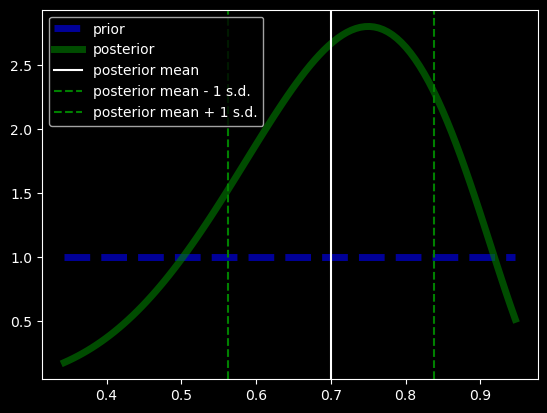

In [3]:
alpha, beta = 7, 3

posterior_mean, posterior_var, posterior_skew, posterior_kurt = scipy.stats.beta.stats(alpha, beta, moments='mvsk')

xs = np.linspace(scipy.stats.beta.ppf(0.01, alpha, beta), scipy.stats.beta.ppf(0.99, alpha, beta), 100)
plt.plot(xs, [1 for x in xs], 'b--', lw=5, alpha=.6, label='prior')
plt.plot(xs, scipy.stats.beta.pdf(xs, alpha, beta), 'g-', lw=5, alpha=.6, label='posterior')
plt.axvline(posterior_mean, label='posterior mean')
posterior_sd = np.sqrt(posterior_var)
plt.axvline(posterior_mean - posterior_sd, linestyle='--', color='g', label='posterior mean - 1 s.d.')
plt.axvline(posterior_mean + posterior_sd, linestyle='--', color='g', label='posterior mean + 1 s.d.')
plt.legend(loc='upper left');

print('posterior mean:', posterior_mean)
print('posterior s.d.:', posterior_sd)

Notice that the mean of the posterior, 0.7, matches the frequentist maximum likelihood estimate of $\theta$, $\hat{\theta}_{\text{ML}}$, and our intuition. Again, it is not unreasonable to assume that the probability of getting heads is 0.7 if we observe heads on seven out of ten coin tosses.

#### A more informative prior: the Beta distribution

Let us question our prior. Is it somewhat *too* uninformative? After all, most coins in the world are (probably!) close to being unbiased.

We could use a $\text{Beta}(\alpha, \beta)$ prior instead of the Uniform prior. Picking $\alpha = \beta = 2$, for example, will give a distribution on $[0, 1]$ centred on $\frac{1}{2}$, incorporating a prior assumption that the coin is unbiased.

The pdf of this prior is given by
$$p(\theta) = \frac{1}{B(\alpha, \beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1}$$
on $\theta \in [0, 1]$, and so the posterior becomes
$$p(\theta \, | \, x_{1:n}) \propto p(x_{1:n} \, | \, \theta) p(\theta) = \theta^{\sum x_i} (1 - \theta)^{n - \sum x_i} \cdot \frac{1}{B(\alpha, \beta)} \theta^{\alpha - 1} (1 - \theta)^{\beta - 1} \propto \theta^{(\alpha + \sum x_i) - 1} (1 - \theta)^{(\beta + n - \sum x_i) - 1},$$
which we recognise as a pdf of the distribution
$$\text{Beta}\left(\theta \, | \, \alpha + \sum x_i, \beta + n - \sum x_i\right).$$

Why did we pick this prior distribution? Its pdf lives entirely on the compact interval $[0, 1]$, unlike, for example, the normal distribution, which has tails extending to $-\infty$ and $+\infty$. With the parameters $\alpha = \beta = 2$, it is centered on $\theta = \frac{1}{2}$, incorporating the prior assumption that the coin is unbiased.

If we initially assume a $\text{Beta}(\theta \,|\, \alpha = 2, \beta = 2)$ prior, then the posterior expectation is
$$\mathbb{E}\left[\theta \,|\, x_{1:n}\right] = \frac{\alpha + \sum x_i}{\alpha + \sum x_i + \beta + n - \sum x_i} = \frac{\alpha + \sum x_i}{\alpha + \beta + n} = \frac{2 + 7}{2 + 2 + 10} = \frac{9}{14} \approx 0.64.$$

Notice that both the prior and posterior belong to the same probability distribution family &mdash; Beta. In Bayesian estimation theory we refer to such prior and posterior as **conjugate distributions** (with respect to this particular likelihood function).

Unsurprisingly, since now our prior assumption is that the coin is unbiased, $\frac{1}{2} < \mathbb{E}\left[\theta \,|\, x_{1:n}\right] < \frac{7}{10}$.

Perhaps surprisingly, we are also somewhat more certain about the posterior (its variance is smaller) than when we assumed the uniform prior.

posterior mean: 0.6428571428571429
posterior s.d.: 0.12371791482634838


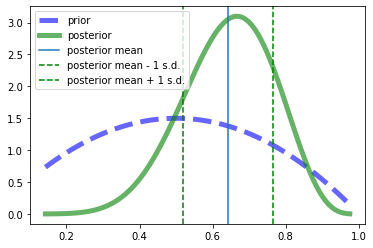

In [5]:
prior_alpha, prior_beta = 2., 2.
posterior_alpha, posterior_beta = prior_alpha + 7, prior_beta + 10 - 7

posterior_mean, posterior_var, posterior_skew, posterior_kurt = scipy.stats.beta.stats(posterior_alpha, posterior_beta, moments='mvsk')

xs = np.linspace(scipy.stats.beta.ppf(0.00001, posterior_alpha, posterior_beta), 
                 scipy.stats.beta.ppf(0.99999, posterior_alpha, posterior_beta), 100)
plt.plot(xs, scipy.stats.beta.pdf(xs, prior_alpha, prior_beta), 'b--', lw=5, alpha=.6, label='prior')
plt.plot(xs, scipy.stats.beta.pdf(xs, posterior_alpha, posterior_beta), 'g-', lw=5, alpha=.6, label='posterior')
plt.axvline(posterior_mean, label='posterior mean')
posterior_sd = np.sqrt(posterior_var)
plt.axvline(posterior_mean - posterior_sd, linestyle='--', color='g', label='posterior mean - 1 s.d.')
plt.axvline(posterior_mean + posterior_sd, linestyle='--', color='g', label='posterior mean + 1 s.d.')
plt.legend(loc='upper left');
print('posterior mean:', posterior_mean)
print('posterior s.d.:', posterior_sd)

Notice that the results of Bayesian estimation are sensitive, to varying degree in each specific case, to the choice of prior distribution.

After all, according to Stephen Senn's *Statistical basis of public policy &mdash; present remembrance of priors past is not the same as a true prior*, British Medical Journal, 1997, **"*A Bayesian is one who, vaguely expecting a horse, and catching a glimpse of a donkey, strongly concludes he has seen a mule.*"**

#### Sequential Bayesian updates

In the previous section we saw that, starting with the prior
$$\text{Beta}\left(\theta \, | \, \alpha, \beta\right),$$
we end up with another Beta-distributed posterior,
$$\text{Beta}\left(\theta \, | \, \alpha + \sum x_i, \beta + n - \sum x_i\right).$$

What would happen if, instead of observing all ten coin tosses at once, we considered each coin toss in turn, obtained our posterior, and used that posterior as a prior for an update based on the information from the next coin toss?

The above two formulae give the answer to this question. We start with our initial prior,
$$\text{Beta}\left(\theta \, | \, \alpha, \beta\right),$$
then, substituting $n = 1$ into the second formula, we get
$$\text{Beta}\left(\theta \, | \, \alpha + x_1, \beta + 1 - x_1\right).$$
Using this posterior as a prior before the second coin toss, we obtain the next posterior as
$$\text{Beta}\left(\theta \, | \, \alpha + x_1 + x_2, \beta + 2 - x_1 - x_2\right).$$

Proceeding along these lines, after all ten coin tosses, we end up with
$$\text{Beta}\left(\theta \, | \, \alpha + \sum x_i, \beta + n - \sum x_i\right),$$
the same result that we would got if we processed all ten coin tosses as a single "batch" as we did the previous section.

This insight forms the basis for a **sequential** or **iterative** application of Bayes's theorem, sequential Bayesian updates, the foundation of real-time **Bayesian filtering**.